In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#### Import gamma result and check it

In [2]:
ga = pd.read_csv('gamma_storage_iter500alpha800.csv', sep = ',', header = None)

In [3]:
np.array(ga.tail(1))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

#### Import c result and allocate samples to clusters using objects pairwise co occurrence (co assoc. matrix)

In [4]:
c = np.array(pd.read_csv('c_storage_iter500alpha800.csv', sep = ',', header = None))

In [5]:
def co_association_matrix(c):
    
    M = np.zeros([c.shape[1],c.shape[1]])

    for i in range(c.shape[1]):

        for j in range(c.shape[1]):

            for k in range(c.shape[0]):

                if c[k,i] == c[k,j]:

                    M[i,j] += 1
    
    return M/c.shape[0] 

In [6]:
M = co_association_matrix(c)
Mdf = pd.DataFrame(M)
Mdf
# two samples are in the same cluster if they happen to have the same labels x% of the time (usually x = 50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.00000,0.99832,0.99886,0.99864,0.99846,0.99828,0.99814,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.99847,0.99850
1,0.99832,1.00000,0.99914,0.99892,0.99882,0.99906,0.99838,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.99841,0.99853
2,0.99886,0.99914,1.00000,0.99978,0.99878,0.99930,0.99888,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.99865,0.99917
3,0.99864,0.99892,0.99978,1.00000,0.99886,0.99952,0.99906,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.99865,0.99939
4,0.99846,0.99882,0.99878,0.99886,1.00000,0.99862,0.99834,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.99873,0.99831
5,0.99828,0.99906,0.99930,0.99952,0.99862,1.00000,0.99872,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.99827,0.99935
6,0.99814,0.99838,0.99888,0.99906,0.99834,0.99872,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.99847,0.99889
7,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.62567,0.59042,0.18713,0.61924,0.61070,0.00000,0.00000
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.62567,1.00000,0.63456,0.23876,0.66235,0.65452,0.00000,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.59042,0.63456,1.00000,0.18637,0.61442,0.62473,0.00000,0.00000


<AxesSubplot:>

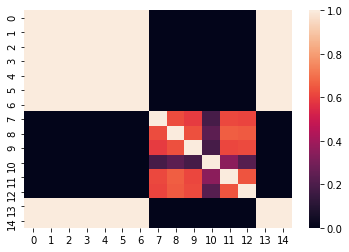

In [7]:
sns.heatmap(M)

In [8]:
assoc_threshold = 0.5

Mdf.iloc[np.array(Mdf >= assoc_threshold)] = 1
Mdf.iloc[np.array(Mdf < assoc_threshold)] = 0

In [9]:
Mdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [10]:
labels = np.arange(c.shape[1])

for sample_1 in range(c.shape[1]):
    for sample_2 in range(sample_1 +1, c.shape[1]):
        if Mdf.loc[sample_1, sample_2] == 1:
            labels[sample_2] = labels[sample_1]
            
def reindexing(c):
    reindexing = {}
    new_label = 1
    for label in np.unique(c):
        reindexing[label] = new_label
        new_label += 1
    for i in range(len(c)):
        c[i] = reindexing[c[i]]
    return c

clust_labels = list(reindexing(labels))
clust_labels

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 1, 1]

### Reminder : true clustering structure
cluster_1 = np.random.normal(-50, 0.04, (4, 20))
cluster_2 = np.random.normal(300, 0.09, (3, 20))
cluster_3 = np.random.normal(1, 0.9, (6, 20))
cluster_4 = np.random.normal(-300, 0.3, (2, 20))
discriminating_data = np.concatenate((cluster_1, cluster_2, cluster_3, cluster_4))
non_discriminating_data = np.random.normal(0, 1, (15, 50))
X = np.concatenate( (discriminating_data, non_discriminating_data), axis=1)
(n,p) = X.shape

In [11]:
true_labels = [1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4]

In [13]:
separation_df = pd.DataFrame([clust_labels, true_labels])
separation_df.index = ['clust labels', 'true labels']
separation_df

# la séparation des données obtenue par l'algo est juste ()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
clust labels,1,1,1,1,1,1,1,2,2,2,3,2,2,1,1
true labels,1,1,1,1,2,2,2,3,3,3,3,3,3,4,4
